In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importer le dataframe
df = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/diabetes.csv')

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

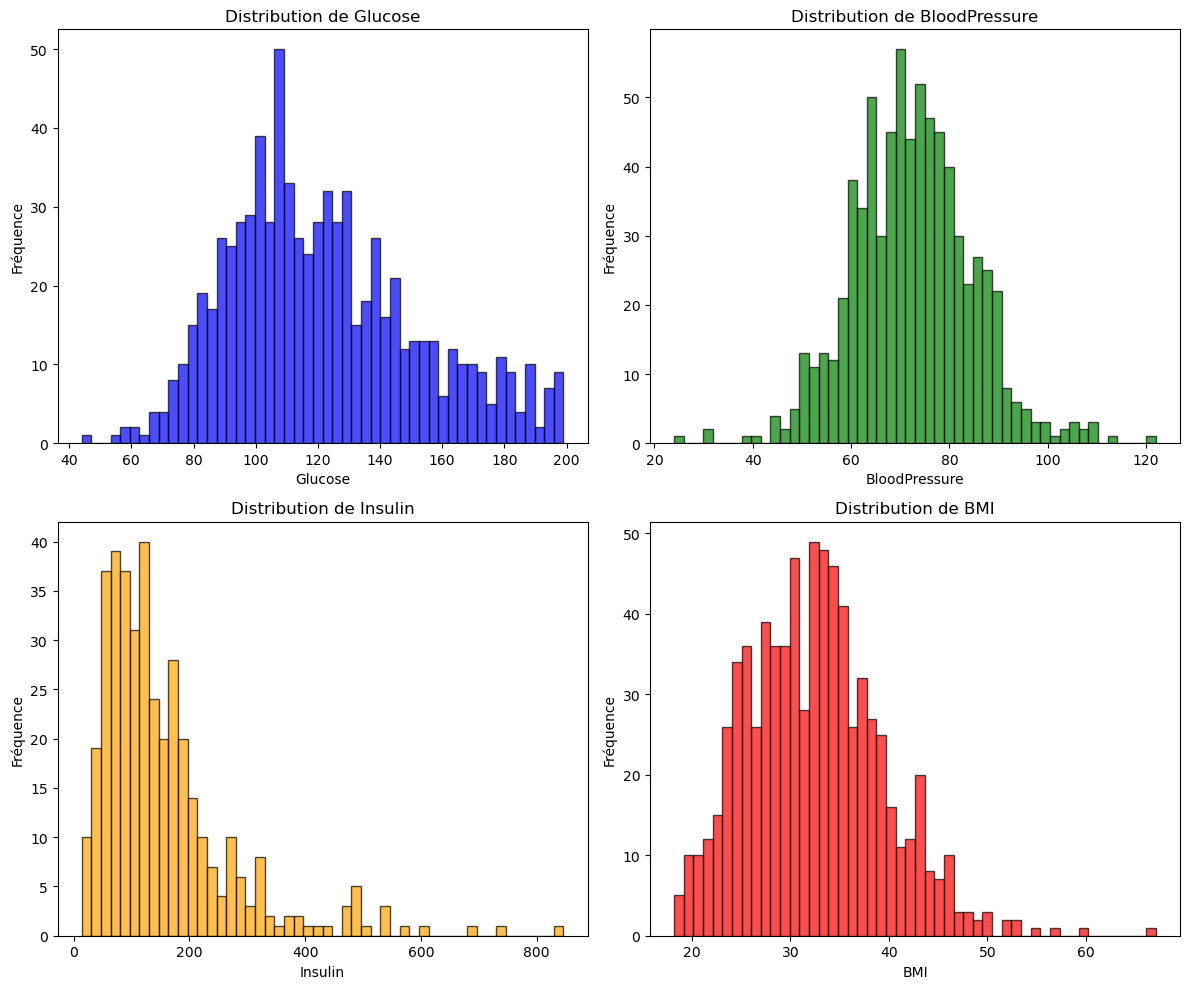

In [9]:
# Création du plot avec 4 subplots pour voir la distribution de mes colonne contenant des 0.
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot de la distribution de Glucose
axs[0, 0].hist(df['Glucose'][df['Glucose'] != 0], bins=50, edgecolor='k', alpha=0.7, color='blue')
axs[0, 0].set_title('Distribution de Glucose')
axs[0, 0].set_xlabel('Glucose')
axs[0, 0].set_ylabel('Fréquence')

# distribution de BloodPressure
axs[0, 1].hist(df['BloodPressure'][df['BloodPressure'] != 0], bins=50, edgecolor='k', alpha=0.7, color='green')
axs[0, 1].set_title('Distribution de BloodPressure')
axs[0, 1].set_xlabel('BloodPressure')
axs[0, 1].set_ylabel('Fréquence')

# distribution de Insulin
axs[1, 0].hist(df['Insulin'][df['Insulin'] != 0], bins=50, edgecolor='k', alpha=0.7, color='orange')
axs[1, 0].set_title('Distribution de Insulin')
axs[1, 0].set_xlabel('Insulin')
axs[1, 0].set_ylabel('Fréquence')

# distribution de BMI
axs[1, 1].hist(df['BMI'][df['BMI'] != 0], bins=50, edgecolor='k', alpha=0.7, color='red')
axs[1, 1].set_title('Distribution de BMI')
axs[1, 1].set_xlabel('BMI')
axs[1, 1].set_ylabel('Fréquence')

# Ajustement des subplots pour éviter le chevauchement
plt.tight_layout()

plt.show()

In [10]:
# Mesure des Skewness
df[['Glucose', 'BloodPressure', 'Insulin','BMI']].skew()

Glucose          0.173754
BloodPressure   -1.843608
Insulin          2.272251
BMI             -0.428982
dtype: float64

L'interprétation des valeurs de skewness (asymétrie) pour décider de remplacer les valeurs nulles (zéros) par la moyenne ou la médiane dépend de la distribution des données. Voici comment interpréter chaque valeur de skewness et prendre une décision appropriée :

Skewness proche de 0 : Les données sont à peu près symétriques. La moyenne et la médiane sont proches l'une de l'autre. Utiliser la moyenne ou la médiane est généralement acceptable.

Skewness négative (inférieure à -1) : Les données sont asymétriques à gauche (queue longue à gauche). Il est préférable d'utiliser la médiane pour remplacer les valeurs nulles.

Skewness positive (supérieure à 1) : Les données sont asymétriques à droite (queue longue à droite). Il est préférable d'utiliser la médiane pour remplacer les valeurs nulles.

**Interprétation des Skewness des colonnes**

Glucose (skewness = 0.173754) :

La skewness est proche de 0, indiquant une distribution à peu près symétrique. Vous pouvez utiliser soit la moyenne, soit la médiane pour remplacer les zéros.

BloodPressure (skewness = -1.843608) :

La skewness est fortement négative, indiquant une distribution asymétrique à gauche. Il est préférable d'utiliser la médiane pour remplacer les zéros.

Insulin (skewness = 2.272251) :

La skewness est fortement positive, indiquant une distribution asymétrique à droite. Il est préférable d'utiliser la médiane pour remplacer les zéros.

BMI (skewness = -0.428982) :

La skewness est légèrement négative, mais proche de 0. Nous pouvons utiliser soit la moyenne, soit la médiane pour remplacer les zéros.

In [11]:
# Remplacer les zéros par la moyenne ou la médiane selon la skewness
columns_skewness = {
    'Glucose': 0.173754,
    'BloodPressure': -1.843608,
    'Insulin': 2.272251,
    'BMI': -0.428982
}

for column, skewness in columns_skewness.items():
    if abs(skewness) < 1:  # Skewness proche de 0 : utiliser la moyenne
        replacement_value = df[df[column] != 0][column].mean()
    else:  # Skewness éloignée de 0 : utiliser la médiane
        replacement_value = df[df[column] != 0][column].median()
    df[column] = df[column].replace(0, replacement_value)

## Donc SkinThickness  n'est pas un marqueur pour le Diabète. Donc Drop

In [12]:
df.drop(columns= 'SkinThickness', inplace=True)

In [13]:
# Afficher la matrice de corrélation avec une heatmap
fig = px.imshow(df.corr(),
                text_auto=True,
                aspect="auto",
                color_continuous_scale='blues',
                title='Matrice de corrélation')
# Ajuster la taille de la figure pour qu'elle soit carrée
fig.update_layout(
    width=800,
    height=800
)
fig.show()

px.imshow est utilisé pour créer une heatmap à partir de la matrice de corrélation.


text_auto=True permet d'afficher les valeurs de corrélation directement sur la heatmap.


aspect="auto" ajuste l'aspect de la heatmap.


In [14]:
# Une vue globale des variables
fig = px.scatter_matrix(
    df,
    dimensions=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age'],
    color='Outcome',
    color_continuous_scale='bluered'
)

fig.update_layout(
    width=1200,
    height=1000
)

fig.show()

In [15]:
# faire le test Kruskal-Wallis encore pour toute mes variables
for var in df.columns:
  group1 = df[df['Outcome'] == 0][var]
  group2 = df[df['Outcome'] == 1][var]
  p_value = kruskal(group1, group2)
  print(var, p_value)

Pregnancies KruskalResult(statistic=30.279026997235565, pvalue=3.7414975961260366e-08)
Glucose KruskalResult(statistic=177.91876321395745, pvalue=1.3799172833750725e-40)
BloodPressure KruskalResult(statistic=22.38390521417873, pvalue=2.2323695647889944e-06)
Insulin KruskalResult(statistic=57.76311336696682, pvalue=2.956624129699043e-14)
BMI KruskalResult(statistic=72.08986553867277, pvalue=2.056170315635966e-17)
DiabetesPedigreeFunction KruskalResult(statistic=23.584359800813168, pvalue=1.1955533210178133e-06)
Age KruskalResult(statistic=73.25301341585387, pvalue=1.1405091208575826e-17)
Outcome KruskalResult(statistic=767.0000000000005, pvalue=8.07317150316437e-169)


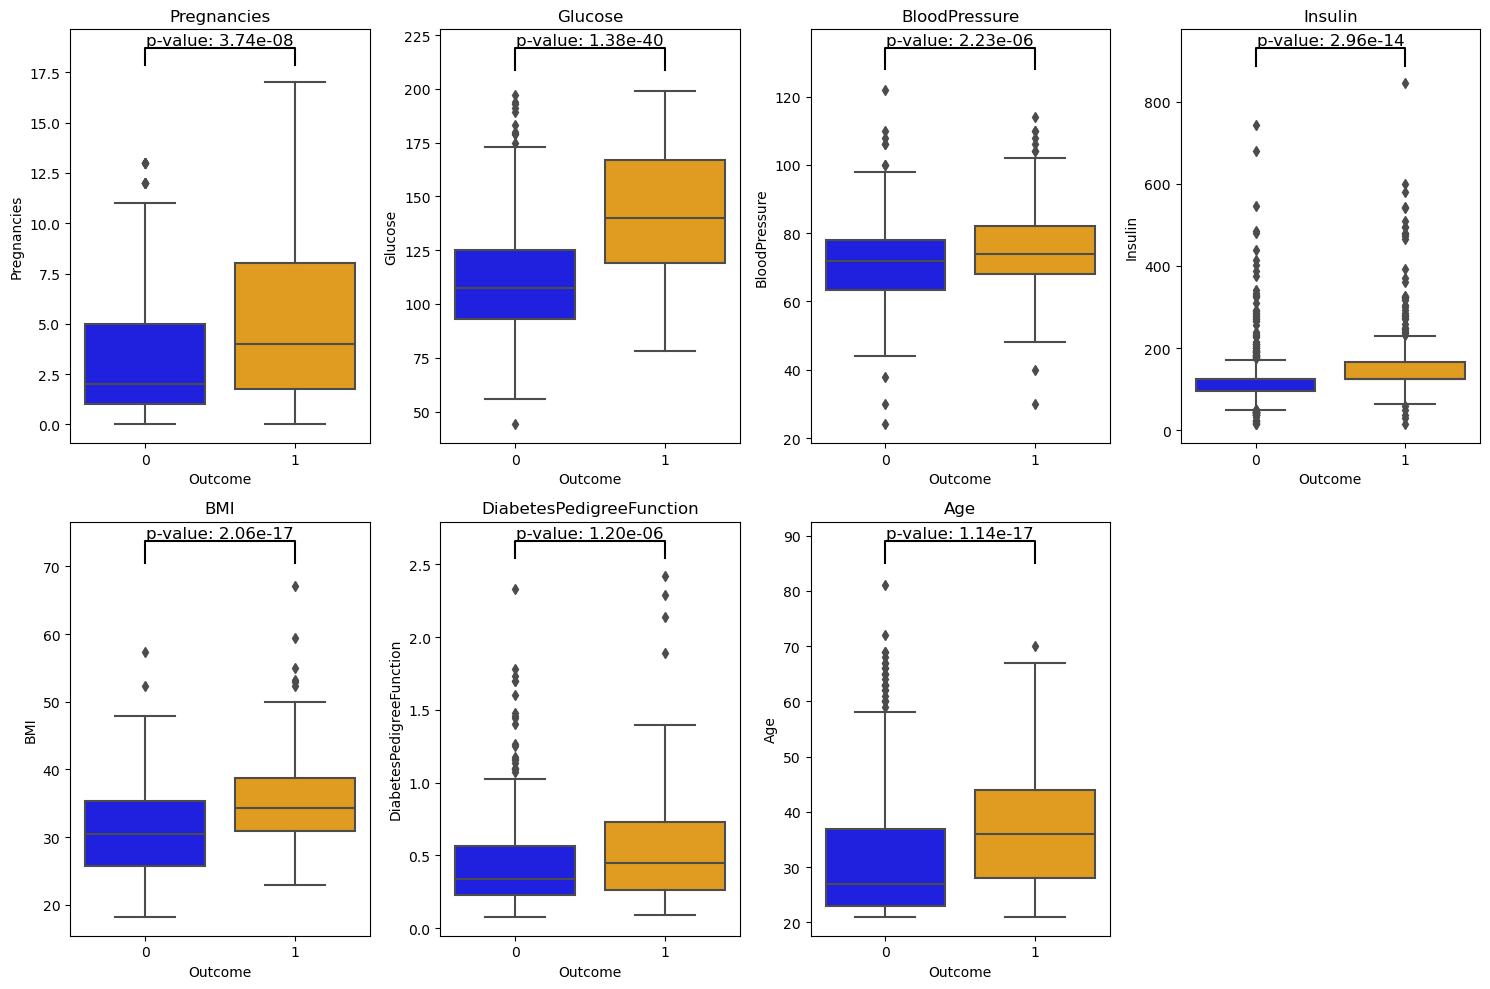

In [16]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
outcome_column = 'Outcome'

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flatten()

colors = ['blue', 'orange']

for i, column in enumerate(columns):
    sns.boxplot(x=outcome_column, y=column, data=df, ax=axes[i], palette=colors)
    stat, pvalue = kruskal(df[df[outcome_column] == 0][column], df[df[outcome_column] == 1][column])
    max_value = df[column].max()
    y, h, col = max_value + (max_value * 0.05), max_value * 0.05, 'k'
    axes[i].plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
    axes[i].text(0.5, y+h, f'p-value: {pvalue:.2e}', ha='center', va='bottom', color=col, fontsize=12)
    axes[i].set_title(column)

# Supprimer le dernier axe vide
fig.delaxes(axes[-1])
plt.tight_layout()

plt.show()

In [17]:
import sys
("Python version is", sys.version)
import sklearn
print("Scikit-learn version is: ", sklearn.__version__)


Scikit-learn version is:  1.2.2


In [18]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split  
from imblearn.over_sampling import RandomOverSampler 

In [19]:
df_clean = pd.read_csv('https://raw.githubusercontent.com/phbarbe/PrediHealth/main/diabetes.csv')

In [20]:
print(df.describe().T)  #Values need to be normalized before fitting. 
print(df.isnull().sum())


                          count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.686763  30.435949  44.000   99.75000   
BloodPressure             768.0   72.386719  12.096642  24.000   64.00000   
Insulin                   768.0  140.671875  86.383060  14.000  121.50000   
BMI                       768.0   32.457464   6.875151  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
Insulin                   125.0000  127.25000  846.00  
BMI                       

In [21]:
df_clean['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [22]:
X = df_clean.drop(columns=['Outcome'])
y = df_clean['Outcome']

In [23]:
ros = RandomOverSampler(random_state=42)

# Appliquer le suréchantillonnage uniquement sur l'ensemble d'entraînement
X_res, y_res = ros.fit_resample(X, y)

In [24]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


In [26]:
# Initiaze the hyperparameters for each dictionary
# each having a key as ‘classifier’ and value as estimator object. 
#The hyperparameter keys should start with the word classifier separated 
# by ‘__’ (double underscore)

In [27]:
# Define parameters for Random Forest 
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [RandomForestClassifier(random_state=42)]
#Total 48 parameters to test (4 * 3 * 4)

In [28]:
# Define parameters for support vector machine (SVC)
param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [SVC(random_state=42)]
#Total 20 parameters to test (5 * 4)

In [29]:
# Define parameters for Logistic regression
param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [LogisticRegression(random_state=42)]
#Total 40 parameters to test (5 * 2 * 4)

In [30]:
# Define parameters for K neighbors
param4 = {}
param4['classifier__n_neighbors'] = [2,5,10,25,50]
param4['classifier'] = [KNeighborsClassifier()]
#Total 5 parameters to test (5)

In [31]:
# Define parameters for Gradient boosting
param5 = {}
param5['classifier__n_estimators'] = [10, 50, 100, 250]
param5['classifier__max_depth'] = [5, 10, 20]
param5['classifier'] = [GradientBoostingClassifier(random_state=42)]
#Total 12 parameters to test (4 * 3)

In [32]:
# XGBoost
param6 = {
    'classifier__n_estimators': [50, 100, 250],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier': [XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')]
}
#Total 27 parametres to test (3*3*3)

In [33]:
# define the pipeline to include scaling and the model. 
# Prepare the pipeline for the 1st model, others will be loaded appropriately
#during the Grid Search
#This pipeline will be the input to cross_val_score, instead of the model. 
# Définir le pipeline incluant la normalisation avec RobustScaler et le modèle
steps = [
    ('scaler', RobustScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
]
pipeline = Pipeline(steps=steps)

In [34]:
#Capture all parameter dictionaries as a list
params = [param1, param2, param3, param4, param5, param6]# Total parameters for all 5 models = 48+20+40+5+12+27 = 152


In [ ]:
# Recherche par grille avec validation croisée
grid = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_res, y_res)

In [36]:
#Gridsearch object (in our case 'grid') stores all the information about
#the best model and corresponding hyperparameters. 
# print the best parameters...
print(grid.best_params_)

{'classifier': GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42), 'classifier__max_depth': 10, 'classifier__n_estimators': 250}


In [37]:
# print best score for the best model (in our case roc_auc score)
print(grid.best_score_)

0.9342466499077453


In [39]:
# Statistiques pour chaque test - nous avons un total de 152 tests
means = grid.cv_results_['mean_test_score']
params_summary = grid.cv_results_['params']

In [41]:
# Créer la matrice de confusion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_res, ypred, labels=grid.classes_)

# Convertir la matrice de confusion en DataFrame
df_cm = pd.DataFrame(cm, index=grid.classes_, columns=grid.classes_)

df_cm

,0,1
0,149,0
1,0,151
